In [1]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('country_vaccinations.csv')
data.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [3]:
data.shape

(14663, 15)

In [4]:
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     5906
people_vaccinated                      6528
people_fully_vaccinated                8708
daily_vaccinations_raw                 7313
daily_vaccinations                      197
total_vaccinations_per_hundred         5906
people_vaccinated_per_hundred          6528
people_fully_vaccinated_per_hundred    8708
daily_vaccinations_per_million          197
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [5]:
data = data.drop(data[data.total_vaccinations.isna()].index)
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                       698
people_fully_vaccinated                2803
daily_vaccinations_raw                 1407
daily_vaccinations                      194
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           698
people_fully_vaccinated_per_hundred    2803
daily_vaccinations_per_million          194
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [6]:
check_data = data.drop(data[data.people_vaccinated.isna()].index)
check_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,74.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,3000.0,0.31,0.31,NaN,77.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.62,0.62,NaN,206.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


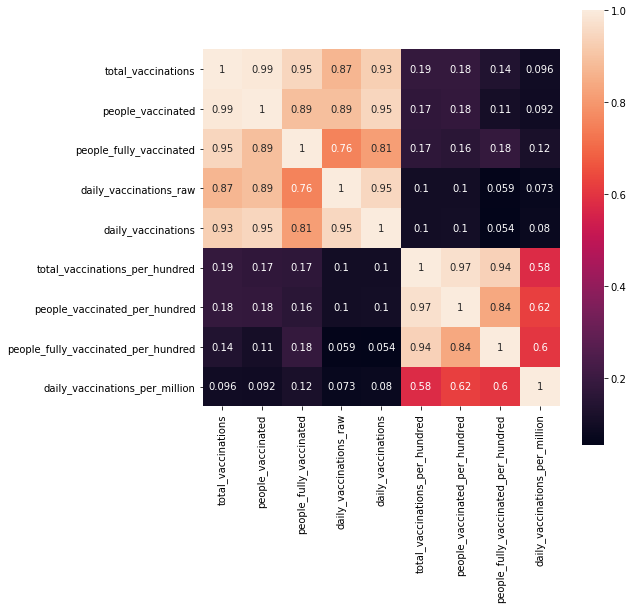

In [7]:
plt.subplots(figsize=(8, 8))
sns.heatmap(check_data.corr(), annot=True, square=True)
plt.show()

In [8]:
scipy.stats.mannwhitneyu(check_data.total_vaccinations, check_data.people_vaccinated, alternative='two-sided')

MannwhitneyuResult(statistic=34088496.0, pvalue=4.577620616600867e-08)

In [9]:
scipy.stats.mannwhitneyu(check_data.total_vaccinations_per_hundred, check_data.people_vaccinated_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=34929587.0, pvalue=9.202028896398536e-17)

In [10]:
diff = check_data.total_vaccinations.mean() - check_data.people_vaccinated.mean()
diff_per_hundred = check_data.total_vaccinations_per_hundred.mean() - check_data.people_vaccinated_per_hundred.mean()

data.people_vaccinated = data.people_vaccinated.fillna(data.total_vaccinations - diff)
data.people_vaccinated_per_hundred = data.people_vaccinated_per_hundred.fillna(data.total_vaccinations_per_hundred - diff_per_hundred)

In [11]:
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                2803
daily_vaccinations_raw                 1407
daily_vaccinations                      194
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    2803
daily_vaccinations_per_million          194
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [12]:
scipy.stats.mannwhitneyu(check_data.people_vaccinated, check_data.daily_vaccinations)

MannwhitneyuResult(statistic=12574814.5, pvalue=0.0)

In [13]:
scipy.stats.mannwhitneyu(check_data.people_vaccinated_per_hundred, check_data.daily_vaccinations_per_million)

MannwhitneyuResult(statistic=754863.0, pvalue=0.0)

In [14]:
data.daily_vaccinations = data.daily_vaccinations.fillna(0)
data.daily_vaccinations_per_million = data.daily_vaccinations_per_million.fillna(0)

In [15]:
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                2803
daily_vaccinations_raw                 1407
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    2803
daily_vaccinations_per_million            0
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [16]:
scipy.stats.mannwhitneyu(check_data.people_fully_vaccinated, check_data.total_vaccinations)

MannwhitneyuResult(statistic=28978014.5, pvalue=1.2827290938007367e-32)

In [17]:
scipy.stats.mannwhitneyu(check_data.people_fully_vaccinated_per_hundred, check_data.total_vaccinations_per_hundred)

MannwhitneyuResult(statistic=31299760.0, pvalue=3.52345522620814e-05)

In [18]:
data.people_fully_vaccinated = data.people_fully_vaccinated.fillna(0)
data.people_fully_vaccinated_per_hundred = data.people_fully_vaccinated_per_hundred.fillna(0)

In [19]:
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                   0
daily_vaccinations_raw                 1407
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred       0
daily_vaccinations_per_million            0
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [20]:
scipy.stats.mannwhitneyu(check_data.daily_vaccinations_raw, check_data.daily_vaccinations)

MannwhitneyuResult(statistic=27220526.5, pvalue=4.578638380335053e-71)

In [21]:
data.daily_vaccinations_raw = data.daily_vaccinations_raw.fillna(0)

In [22]:
data.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64